In [21]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [22]:
df = pd.read_csv("C:\California_house_2.csv")

In [23]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


In [24]:
# 기초통계랑 확인
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [25]:
X = df.drop('median_house_value', axis=1).fillna(0)
X = X.drop('ocean_proximity',axis=1).to_numpy()
Y = df["median_house_value"].to_numpy().reshape(-1,1)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.5)

<Axes: >

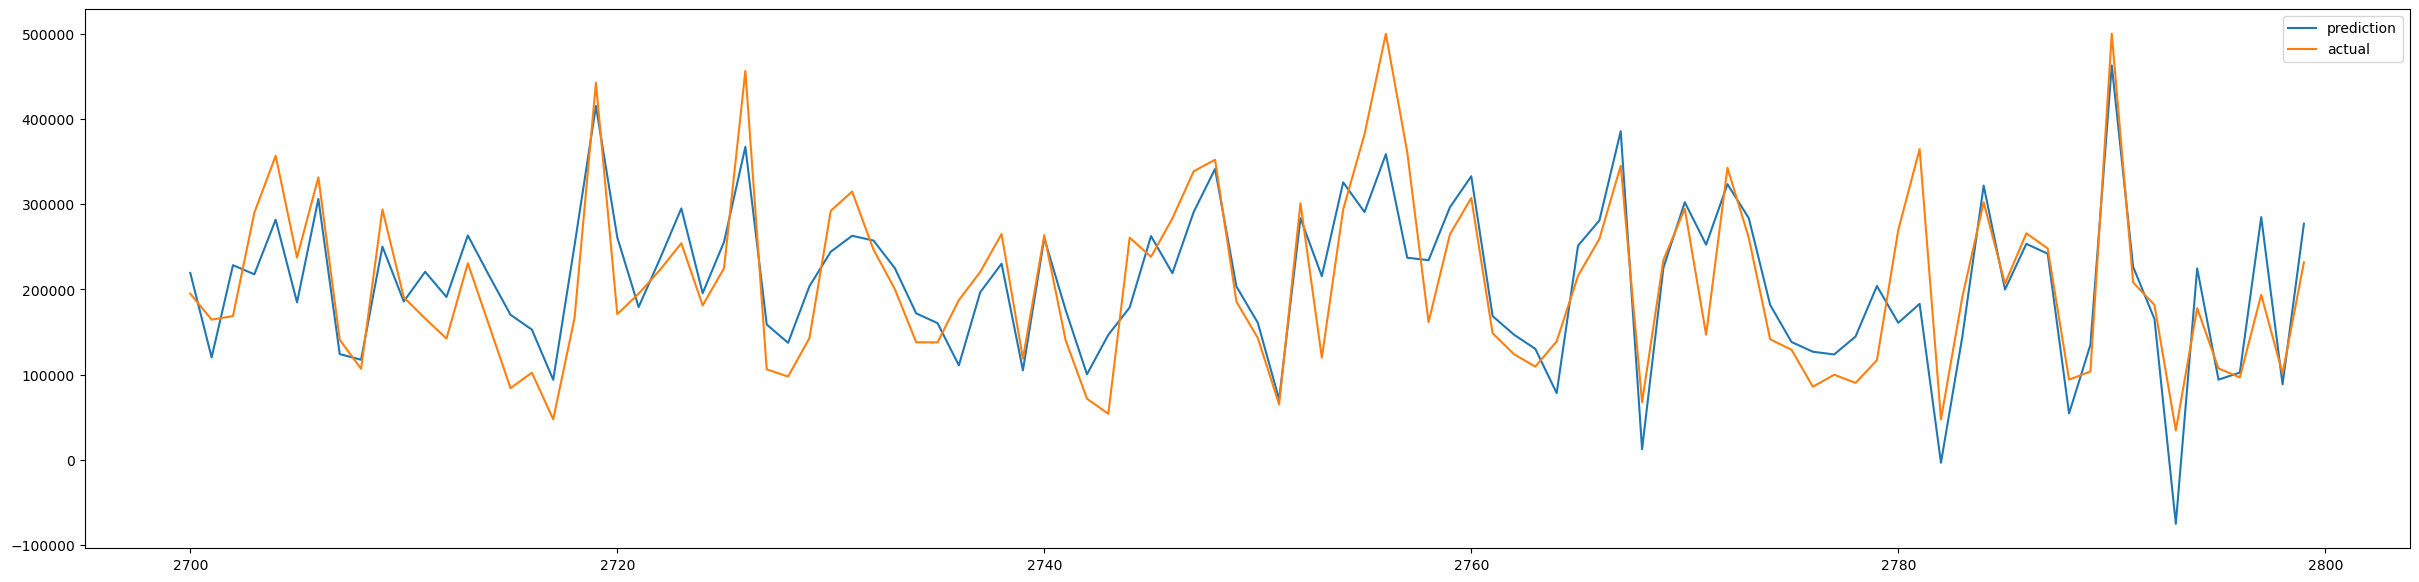

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

linear = LinearRegression()
linear.fit(x_train,y_train)

y_pred = linear.predict(x_train)
prediction = linear.predict(x_test)
pred = pd.DataFrame(prediction, columns=['prediction'])
actual = pd.DataFrame(y_test, columns=["actual"])

table = pd.concat([pred,actual],axis=1)

table.iloc[2700:2800].plot(figsize=(30,7))


In [27]:
rmse_train_individual = [np.sqrt(mean_squared_error(y_train[i], linear.predict(x_train[i].reshape(1, -1)))) for i in range(len(y_train))]
rmse_train_mean = np.mean(rmse_train_individual)
print(f"훈련 set의 평균 RMSE: {rmse_train_mean}")

rmse_test_individual = [np.sqrt(mean_squared_error(y_test[i], linear.predict(x_test[i].reshape(1, -1)))) for i in range(len(y_test))]
rmse_test_mean = np.mean(rmse_test_individual)
print(f"test set의 평균 RMSE: {rmse_test_mean}")

훈련 set의 평균 RMSE: 50579.32359941973
test set의 평균 RMSE: 51495.31544886636


In [28]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

import seaborn as sns

In [29]:
cols = ["population", "median_income", "median_house_value"]

In [30]:
data = torch.from_numpy(df[cols].values).float()

data.shape

torch.Size([20640, 3])

In [31]:
data

tensor([[3.2200e+02, 8.3252e+00, 4.5260e+05],
        [2.4010e+03, 8.3014e+00, 3.5850e+05],
        [4.9600e+02, 7.2574e+00, 3.5210e+05],
        ...,
        [1.0070e+03, 1.7000e+00, 9.2300e+04],
        [7.4100e+02, 1.8672e+00, 8.4700e+04],
        [1.3870e+03, 2.3886e+00, 8.9400e+04]])

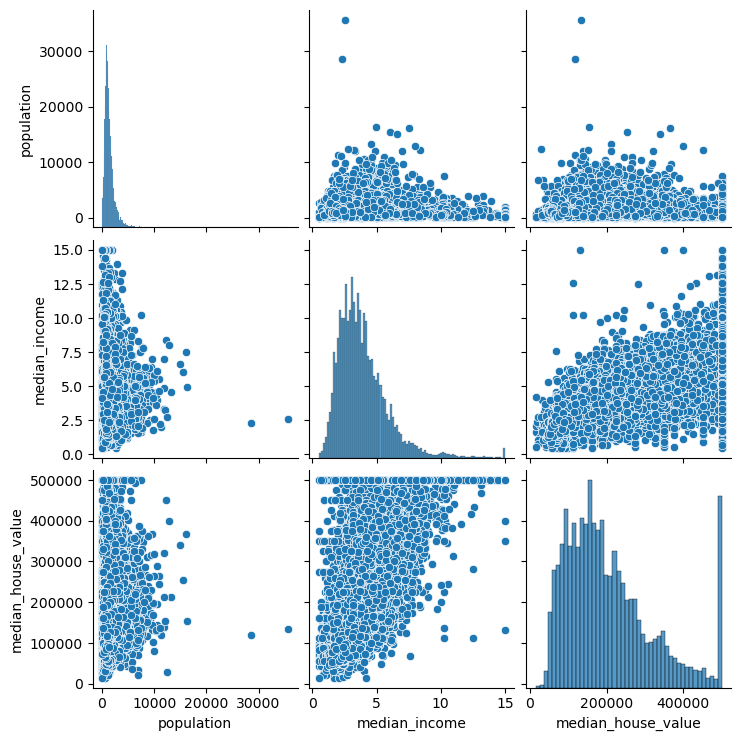

In [32]:
sns.pairplot(df[cols])
plt.show()